In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [23]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import seaborn as sns
print("SciPy version: {}".format(sns.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.16 (default, Jan 17 2023, 22:20:44) 
[GCC 11.2.0]
pandas version: 1.3.5
matplotlib version: 3.5.3
NumPy version: 1.19.2
SciPy version: 1.7.3
SciPy version: 0.12.2
IPython version: 7.31.1
scikit-learn version: 1.0.2


In [24]:
train_data = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train_data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [26]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [27]:
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)

print("% of first class who survived:", rate_class1)

class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class2)

print("% of second class who survived:", rate_class2)

class3= train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)

print("% of third class who survived:", rate_class3)

% of first class who survived: 0.6296296296296297
% of second class who survived: 0.47282608695652173
% of third class who survived: 0.24236252545824846


# Random Forest Classifier

In [28]:
test_data = pd.read_csv("./test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)


train_predictions = model.predict(X_train)
train_output = pd.DataFrame({'PassengerId': train_data.PassengerId, 'Survived': train_predictions})
print(train_output)

print(f"Model score: {model.score(X_train , y)}")

predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")



     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         0
889          890         0
890          891         0

[891 rows x 2 columns]
Model score: 0.8159371492704826
Your submission was successfully saved!


## Linear Regression on Length of name

In [30]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

name_length_data = [len(name) for name in train_data["Name"]]

train_data2 = zip(train_data["PassengerId"], train_data["Age"], name_length_data, train_data["Survived"])

td2_array = np.array(train_data2)
td2_array.reshape(1,-1)

td2_df = pd.DataFrame(train_data2, columns=["PassengerID", "Age", "NameLength", "Survived"])


td2_df.head()

,PassengerID,Age,NameLength,Survived
0,1,22.0,23,0
1,2,38.0,51,1
2,3,26.0,22,1
3,4,35.0,44,1
4,5,35.0,24,0


<AxesSubplot:xlabel='Age', ylabel='NameLength'>

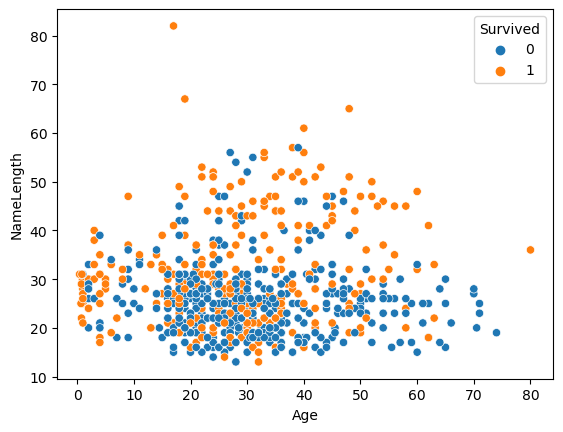

In [31]:
sns.scatterplot(data=td2_df, x="Age", y="NameLength", hue="Survived")

In [32]:
import matplotlib.pyplot as plt

corr2 = td2_df.corr()
corr2.style.background_gradient(cmap="coolwarm")

corr1 = train_data.corr()
corr1.style.background_gradient(cmap="coolwarm")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer



knn_data = zip(train_data["Sex"]=='female', td2_df["NameLength"], train_data["Age"], train_data["Fare"], train_data["SibSp"], train_data["Parch"], train_data["Pclass"])
knn_df = pd.DataFrame(knn_data)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(knn_df)

knn_df.head()



,0,1,2,3,4,5,6
0,False,23,22.0,7.2500,1,0,3
1,True,51,38.0,71.2833,1,0,1
2,True,22,26.0,7.9250,0,0,3
3,True,44,35.0,53.1000,1,0,1
4,False,24,35.0,8.0500,0,0,3


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y)



print(f"Model score: {knn_model.score(X_train, y)}")

Model score: 0.9966329966329966


In [35]:
test_data = pd.read_csv("./test.csv")

name_length_data = [len(name) for name in test_data["Name"]]


knntest = zip(test_data["Sex"]=='female', name_length_data, test_data["Age"], test_data["Fare"], test_data["SibSp"], test_data["Parch"], test_data["Pclass"])
knn_df = pd.DataFrame(knntest)

knn_df.head()

imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(knn_df)

predictions = knn_model.predict(X_test)

knn_df.head()



,0,1,2,3,4,5,6
0,False,16,34.5,7.8292,0,0,3
1,True,32,47.0,7.0000,1,0,3
2,False,25,62.0,9.6875,0,0,2
3,False,16,27.0,8.6625,0,0,3
4,True,44,22.0,12.2875,1,1,3


In [36]:
predictions = knn_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

print(output)

Your submission was successfully saved!
     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


## Sex alone